In [97]:
# Importing the basic librarires 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Getting our model dataset

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [99]:
# Finding missing data or nan-values if any in the dataset.
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [100]:
# Pandas info() function to get a quick overview of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [101]:
# Pandas describe() to get some basic statistical details of our features .
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [102]:
# corr() to find correlation amongst dataset features.
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [103]:
# dividng our features into input and output features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [104]:
# Doing One-hot-encoding on our State feature as it is a categorical feature
States=pd.get_dummies(X['State'],drop_first=True)

In [105]:
# joining or concating the new features to our input features
X=pd.concat([X,States],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,State,Florida,New York
0,165349.20,136897.80,471784.10,New York,False,True
1,162597.70,151377.59,443898.53,California,False,False
2,153441.51,101145.55,407934.54,Florida,True,False
3,144372.41,118671.85,383199.62,New York,False,True
4,142107.34,91391.77,366168.42,Florida,True,False


In [106]:
# since state feature is no longer needed ,so dropping it 
X=X.drop('State',axis=1)

In [107]:
# after dropping
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


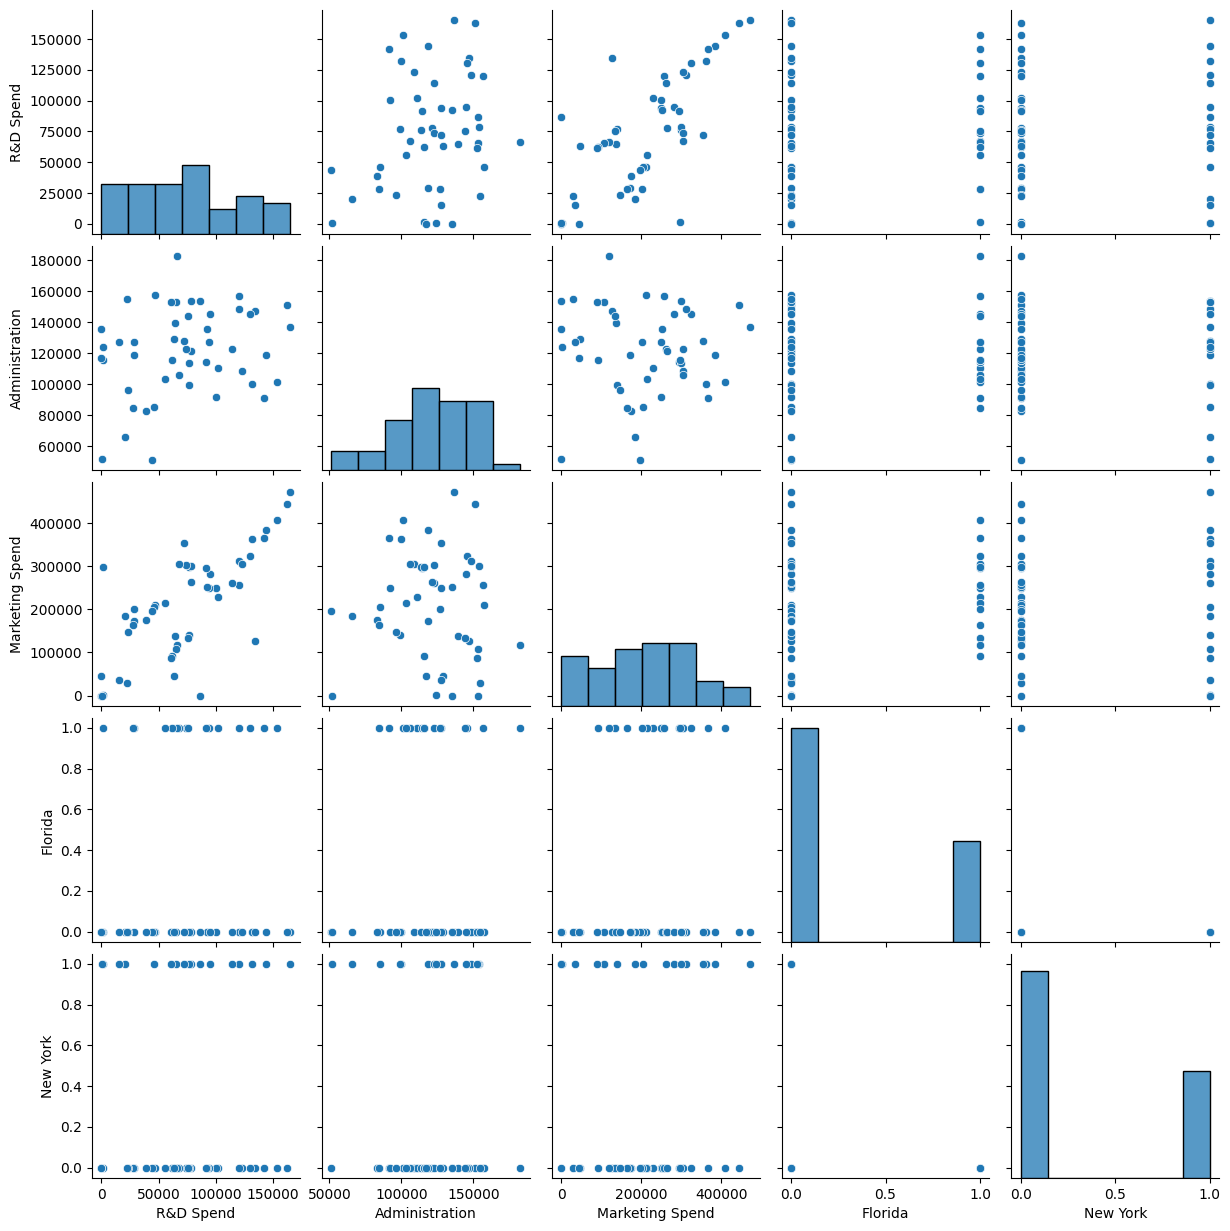

In [108]:
# Doing basic ploting of our dataset features
import seaborn as sns
sns.pairplot(X)

# PERFORMING VERY BASIC MACHINE LEARNING ALGORITHMS SINCE IT IS THE FIRST PROJECT

In [109]:
# Spliting our dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

### LINEAR REGRESSION

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [112]:
y_predict=regressor.predict(X_test)

In [113]:
from sklearn.metrics import r2_score

In [114]:
rl_test_score=r2_score(y_test,y_predict)
round(rl_test_score*100,2)

93.47

### RIDGE REGRESSION

In [115]:
from sklearn.linear_model import Ridge

In [116]:
r_regressor=Ridge(alpha=0.01)

In [117]:
r_regressor.fit(X_train,y_train)

Ridge(alpha=0.01)

In [118]:
rr_train_score=r2_score(y_train,r_regressor.predict(X_train))
rr_train_score

0.9501847625348212

In [119]:
ridge_predict=r_regressor.predict(X_test)

In [120]:
rr_test_score=r2_score(y_test,ridge_predict)
rr_test_score

0.9347119764305162

### LASSO REGRESSION

In [121]:
from sklearn.linear_model import Lasso

In [122]:
l_regressor=Lasso(alpha=0.1)

In [123]:
l_regressor.fit(X_train,y_train)

Lasso(alpha=0.1)

In [124]:
rlasso_train_score=r2_score(y_train,l_regressor.predict(X_train))
rlasso_train_score

0.9501847627042606

In [125]:
laso_predict=l_regressor.predict(X_test)
X_test

,R&D Spend,Administration,Marketing Spend,Florida,New York
28,66051.52,182645.56,118148.20,True,False
11,100671.96,91790.61,249744.55,False,False
10,101913.08,110594.11,229160.95,True,False
41,27892.92,84710.77,164470.71,True,False
2,153441.51,101145.55,407934.54,True,False
27,72107.60,127864.55,353183.81,False,True
38,20229.59,65947.93,185265.10,False,True
31,61136.38,152701.92,88218.23,False,True
22,73994.56,122782.75,303319.26,True,False
4,142107.34,91391.77,366168.42,True,False


In [131]:
pd.DataFrame(y_test)

,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


In [132]:
laso_predict

array([103015.59754148, 132582.35641541, 132448.23809553,  71976.51627517,
       178537.96831552, 116160.80037302,  67851.36460786,  98791.45133165,
       113969.78652504, 167921.57523824])

In [127]:
lasso_test_score=r2_score(y_test,laso_predict)
lasso_test_score

0.9347092144477324

### DUMPING OUR TRAINED MODEL INTO A PICKEL FILE (SERIALIZATION AND DESERIALIZATION OF MODEL)

In [128]:
import pickle

In [129]:
pickle.dump(l_regressor,open('model.pkl','wb'))